In [4]:
import pandas as pd
import mysql.connector

In [6]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='2510',
    database='e_master_card'
)

In [25]:
df_cust = pd.read_sql("SELECT * FROM e_master_card.customers", conn)
df_cust.head()

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\1847187042.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cust = pd.read_sql("SELECT * FROM e_master_card.customers", conn)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [9]:
df_transactions =  pd.read_sql("SELECT * FROM transactions",conn)
df_transactions.head()

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\1313140918.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions =  pd.read_sql("SELECT * FROM transactions",conn)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [13]:
df_cs = pd.read_sql("SELECT * FROM credit_profiles",conn)
df_cs.head()

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\3118645771.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cs = pd.read_sql("SELECT * FROM credit_profiles",conn)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [26]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [30]:
df_cust['annual_income'] = df_cust['annual_income'].replace(0, 2)
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.899000
std,288.819436,15.666155,113706.197202
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [31]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [40]:
print(df_cust.isnull().sum())

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64


In [41]:
df_cust.annual_income.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: annual_income, Length: 1000, dtype: bool

In [47]:
import numpy as np
import pandas as pd

df_cust['annual_income'] = df_cust['annual_income'].replace(0, np.nan)

# Now check the count of nulls
print(df_cust['annual_income'].isna().sum())

50


In [62]:
query = "SELECT *FROM customers WHERE annual_income = 0"
df_cust = pd.read_sql(query, conn)

# Show results
print(df_cust)

    cust_id               name  gender  age location           occupation  \
0        15      Sanjana Malik  Female   25    Rural               Artist   
1        83  Reyansh Mukherjee    Male   27     City           Freelancer   
2        98         Virat Puri    Male   47   Suburb       Business Owner   
3       103         Aarav Shah    Male   32     City       Data Scientist   
4       156       Kiaan Saxena    Male   24     City  Fullstack Developer   
5       171       Advait Verma    Male   52     City       Business Owner   
6       187       Samar Sardar    Male   53     City           Consultant   
7       193        Ishan Joshi    Male   37   Suburb       Data Scientist   
8       228   Advait Mukherjee    Male   48     City       Business Owner   
9       233        Aditya Goel    Male   26     City           Freelancer   
10      241        Aaryan Bose    Male   24   Suburb           Freelancer   
11      273       Kunal Sahani    Male   50   Suburb       Business Owner   

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\1028413763.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cust = pd.read_sql(query, conn)


In [49]:
print(len(df_cust))

50


In [54]:
(df_cust['annual_income'] == 0).sum()

np.int64(50)

In [63]:
df_cust[df_cust['annual_income'] == 0]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
1,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
2,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
3,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
4,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
5,171,Advait Verma,Male,52,City,Business Owner,0,Single
6,187,Samar Sardar,Male,53,City,Consultant,0,Single
7,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
8,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married
9,233,Aditya Goel,Male,26,City,Freelancer,0,Married


In [64]:
df_cust[df_cust['annual_income'] == 0].shape

(50, 8)

In [88]:
query = "SELECT * FROM customers"
df_cust = pd.read_sql(query, conn)


df_cust[df_cust['occupation'] == "Artist"].head(4)


C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\598125808.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cust = pd.read_sql(query, conn)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
19,20,Dhruv Malhotra,Male,28,City,Artist,33377,Single
41,42,Aaryan Shah,Male,110,City,Artist,7621,Married
62,63,Ananya Yadav,Female,22,Rural,Artist,35667,Single


In [89]:
df_cust[df_cust['occupation'] == "Artist"]['annual_income'].median()



np.float64(44915.0)

In [83]:
print(df_cust.columns)

Index(['occupation'], dtype='object')


In [91]:
df_cust[df_cust['annual_income'] == 0].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married


In [92]:
df_cust[df_cust['occupation']=="Artist"]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
19,20,Dhruv Malhotra,Male,28,City,Artist,33377,Single
41,42,Aaryan Shah,Male,110,City,Artist,7621,Married
62,63,Ananya Yadav,Female,22,Rural,Artist,35667,Single
63,64,Aaryan Puri,Male,29,City,Artist,37897,Married
127,128,Aaditya Yadav,Male,28,Rural,Artist,45794,Married
129,130,Kabir Sareen,Male,28,City,Artist,74464,Married
130,131,Aarya Singh,Male,26,City,Artist,59543,Married
150,151,Ishan Mistry,Male,29,City,Artist,61482,Married
204,205,Rohan Shetty,Male,26,City,Artist,45048,Married


In [93]:
df_cust[df_cust['occupation']=="Artist"]["annual_income"].median()

np.float64(44915.0)

In [94]:
df_cust[df_cust['occupation']=="Data Scientist"]["annual_income"].median()

np.float64(127889.0)

In [98]:
occupation_wise_inc_median = df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [99]:
occupation_wise_inc_median["Artist"]

np.float64(44915.0)

In [107]:
def get_median_val(row):
    if row["annual_income"] == 0:
        return None  # or perform some other action if income is zero
    else:
        return row["annual_income"]

# Testing the function
result = get_median_val({"cust_id": 3245, "annual_income": 678})
print(result)

678


In [112]:
def get_median_val(row):
    if row["annual_income"]:
        return occupation_wise_inc_median[row["occupation"]]# or perform some other action if income is zero
    else:
        return row["annual_income"]

# Testing the function
result = get_median_val({"cust_id": 3245, "occupation": "Artist","annual_income": None})
print(result)

None


In [110]:
df_cust["annual_income"] = df_cust.apply(
    get_median_val,
    axis=1
)

In [113]:
#learn lambda
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [116]:
df_cust.iloc[[14,22,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,44915.0,Married
22,23,Ishan Patel,Male,19,City,Freelancer,36863.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,45189.5,Single


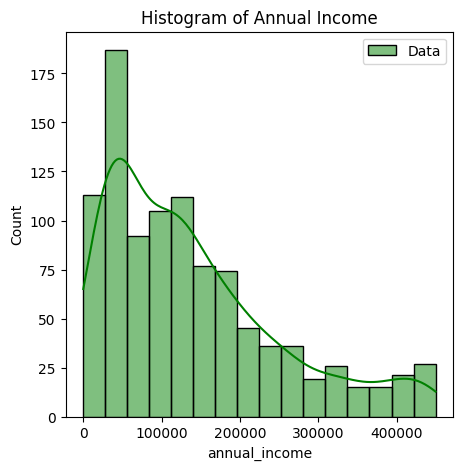

In [119]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_cust is your DataFrame with the "annual_income" column
plt.figure(figsize=(5,5))
sns.histplot(df_cust["annual_income"], kde=True, color='green', label='Data')
plt.title("Histogram of Annual Income")
plt.legend()  # This adds the label in the plot
plt.show()

In [120]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138634.437500
std,288.819436,15.666155,110961.396638
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [121]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [122]:
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [131]:
df_cust.at[4,"annual_income"]

np.float64(39406.0)

In [132]:
for index, row in df_cust.iterrows():
 if row["annual_income"] <100:
     df_cust.at[index,"annual_income"] = occupation_wise_inc_median[row["occupation"]]
     

In [133]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [134]:
df_cust.loc[[31,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,254881.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,51175.0,Married


In [135]:
avg_income_per_occupation = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

In [136]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [137]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45239.84210526, 268119.83391003,  59927.25773196,
       136208.60326087,  76293.08991228,  78618.38513514])

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\3177901913.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_occupation.index , y=avg_income_per_occupation.values,palette="tab10")


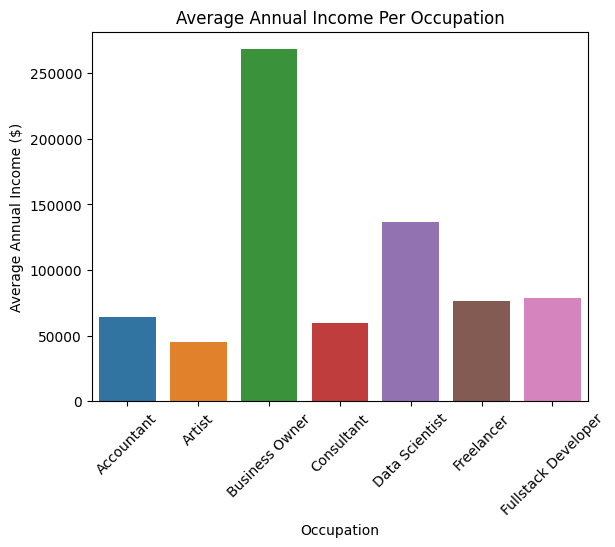

In [143]:
sns.barplot(x=avg_income_per_occupation.index , y=avg_income_per_occupation.values,palette="tab10")
plt.xticks(rotation=45)

plt.title("Average Annual Income Per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income ($)")
plt.show()

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\1964360424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index , y=avg_income_per_group.values,palette="tab10")


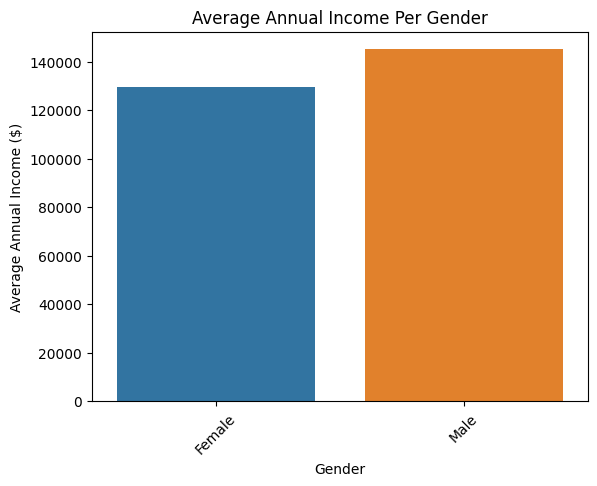

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\1964360424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index , y=avg_income_per_group.values,palette="tab10")


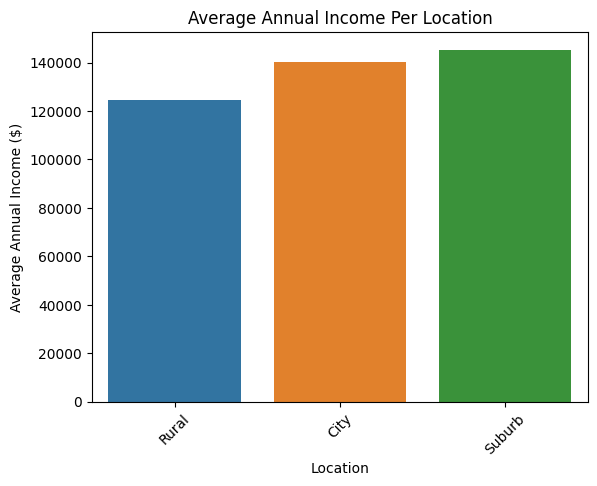

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\1964360424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index , y=avg_income_per_group.values,palette="tab10")


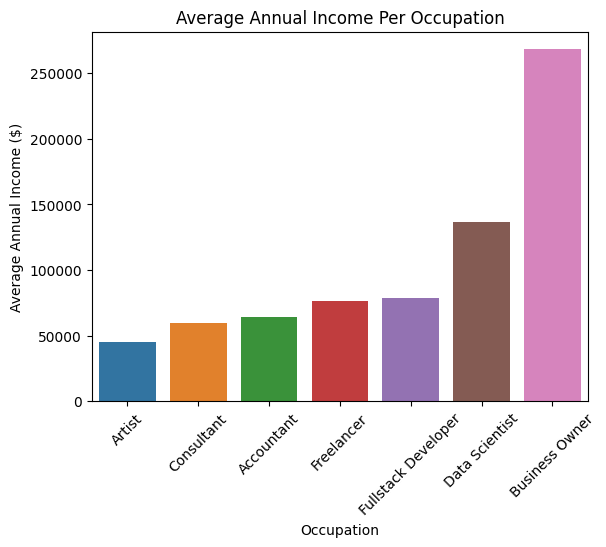

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\1964360424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index , y=avg_income_per_group.values,palette="tab10")


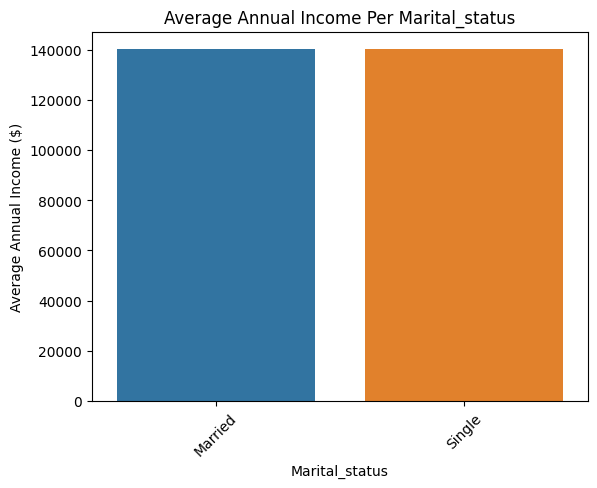

In [157]:
categorical_columns = ['gender','location','occupation','marital_status']
for col in categorical_columns:
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index , y=avg_income_per_group.values,palette="tab10")
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel("Average Annual Income ($)")
    plt.show()


2. Analyze Age Column

In [158]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [159]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

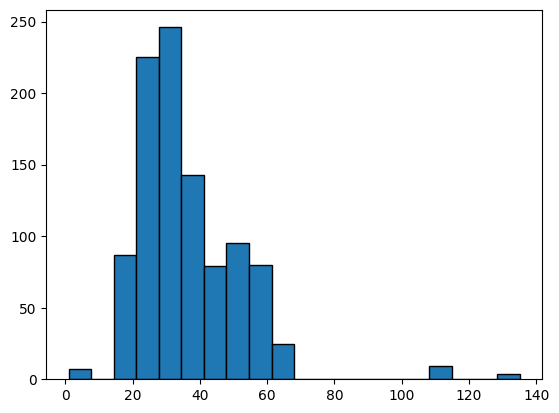

In [166]:
plt.hist(df_cust.age,bins=20, edgecolor="black")
plt.show()

In [176]:
outliers=df_cust[(df_cust.age<15) |(df_cust.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [172]:
df_cust.age.median()

np.float64(32.0)

In [185]:
median_age_per_occupation = df_cust.groupby("occupation")["age"].median()
median_age_per_occupation


occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [184]:
for index, row in outliers.iterrows():
    df_cust.at[index,'age'] = median_age_per_occupation[row['occupation']]

In [186]:
df_cust[(df_cust.age<15) |(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [187]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1001.000000,1000.000000
mean,500.500000,35.533467,140137.395500
std,288.819436,12.273126,110450.464107
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.000000,195514.250000
max,1000.000000,64.000000,449346.000000


In [188]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [191]:
def get_age_group(row):
    if row['age']>18 and row['age']<25:
        return '18-25'
df_cust.apply(get_age_group,axis=1)       

0         None
1         None
2        18-25
3        18-25
4         None
         ...  
996       None
997       None
998       None
999       None
index     None
Length: 1001, dtype: object

In [194]:

import matplotlib.pyplot as plt
import pandas as pd
bin_edges = [17,25,48,65]
bin_labels =['18-25','26-48','49-65']

df_cust['age_group'] = pd.cut(df_cust['age'],bins=bin_edges,labels=bin_labels)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [202]:

age_group_counts = df_cust.age_group.value_counts(normalize=True)*1
age_group_counts

age_group
26-48    0.567433
18-25    0.245754
49-65    0.186813
Name: proportion, dtype: float64

In [203]:
type(age_group_counts)


pandas.core.series.Series

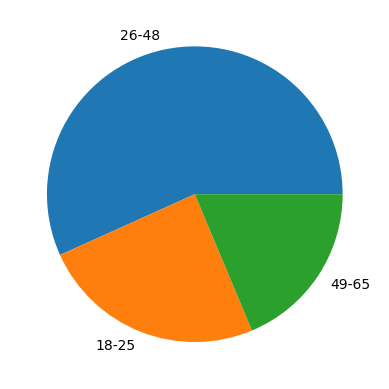

In [209]:
plt.pie(age_group_counts,labels=age_group_counts.index)
plt.show()

In [210]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [211]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [212]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [217]:
a = df_cust.groupby(['location','gender']).size().unstack()
a

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


<Axes: xlabel='location'>

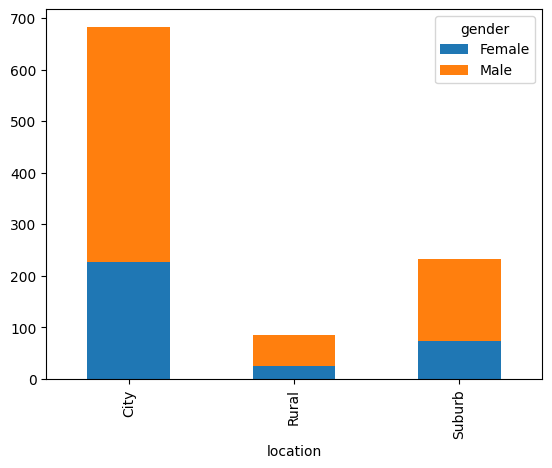

In [218]:
a.plot(kind="bar",stacked=True)

In [219]:
df_cs.shape


(1004, 6)

In [220]:
df_cust.shape

(1001, 9)

In [222]:
df_cs['cust_id'].nunique()

1000

In [225]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [228]:
df_cs_clean1 = df_cs.drop_duplicates(subset="cust_id",keep="last")
df_cs_clean1.shape

(1000, 6)

In [229]:
df_cs_clean1[df_cs_clean1['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [230]:
df_cs_clean1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [231]:
df_cs_clean1[df_cs_clean1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [232]:
df_cs_clean1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

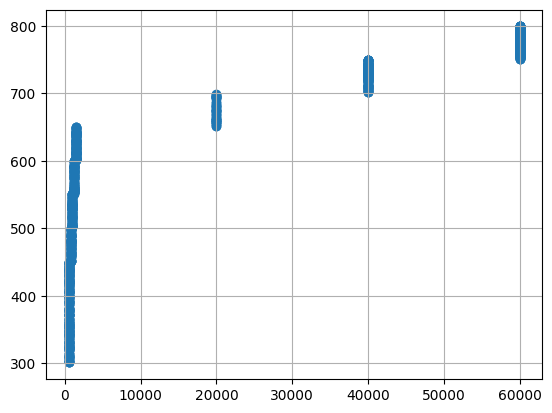

In [236]:
plt.scatter(df_cs_clean1.credit_limit,df_cs_clean1.credit_score)
plt.grid(True)
plt.show()


In [242]:
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges[:-1], bin_ranges[1:])]
df_cs_clean1.loc[:, 'credit_score_range'] = pd.cut(
    df_cs_clean1['credit_score'],
    bins=bin_ranges,
    labels=bin_labels,
    include_lowest=True,
    right=False
)

In [243]:
df_cs_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [248]:
df_cs_clean1[df_cs_clean1.credit_score_range=="700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [255]:
mode_df = df_cs_clean1.groupby("credit_score_range")['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df 

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\2453781155.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df = df_cs_clean1.groupby("credit_score_range")['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [258]:
df_cs_clean1[df_cs_clean1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
845,842,490,0.555309,249.0,1.0,NaN,450-499
954,951,513,0.175914,131.0,3.0,NaN,500-549
809,806,617,0.421308,416.0,1.0,NaN,600-649


In [261]:
df_cs_clean2 = pd.merge(df_cs_clean1, mode_df, on="credit_score_range",suffixes=("","_mode"))
df_cs_clean2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
371,372,671,0.650557,7434.0,2.0,20000.0,650-699,20000.0
420,421,730,0.117584,2812.0,3.0,40000.0,700-749,40000.0
958,959,628,0.390671,419.0,4.0,1500.0,600-649,1500.0


In [263]:
df_cs_clean2[df_cs_clean2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
841,842,490,0.555309,249.0,1.0,NaN,450-499,750.0
380,381,626,0.216894,235.0,0.0,NaN,600-649,1500.0
944,945,526,0.272734,227.0,1.0,NaN,500-549,1000.0


In [266]:
df_cs_clean3=df_cs_clean2.copy()
df_cs_clean2['credit_limit'] = df_cs_clean2['credit_limit'].fillna(df_cs_clean2['credit_limit_mode'])
df_cs_clean3.shape

(1000, 8)

In [269]:
df_cs_clean3[df_cs_clean3.credit_limit.isnull()].shape

(0, 8)

In [270]:
df_cs_clean3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [271]:
df_cs_clean3.loc[[717,869]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
717,718,481,0.127147,68.0,0.0,750.0,450-499,750.0
869,870,355,0.215661,93.0,4.0,500.0,300-449,500.0


In [272]:
df_cs_clean3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


<Axes: ylabel='outstanding_debt'>

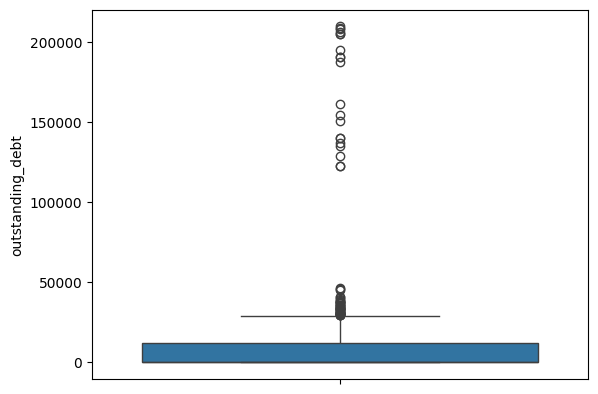

In [274]:
sns.boxplot(df_cs_clean3.outstanding_debt)

In [275]:
df_cs_clean3[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [279]:
df_cs_clean3.loc[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit,'outstanding_debt'] =df_cs_clean3['credit_limit'] 

In [280]:
df_cs_clean3[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [281]:
df_cs_clean3.loc[[6,12]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
12,13,476,0.822498,318.0,3.0,750.0,450-499,750.0


In [ ]:
# corelation bivariate Analysis

In [283]:
df_cs_clean3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [284]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [286]:
df_merged = df_cust.merge(df_cs_clean3, on="cust_id",how="inner")
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [293]:
numerical_cols = ["credit_score","credit_utilisation","outstanding_debt","credit_limit","annual_income","age"]

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575685,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086816,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555077,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684627,0.510993
annual_income,0.575685,-0.086816,0.555077,0.684627,1.000000,0.618136
age,0.444917,-0.027713,0.444301,0.510993,0.618136,1.000000


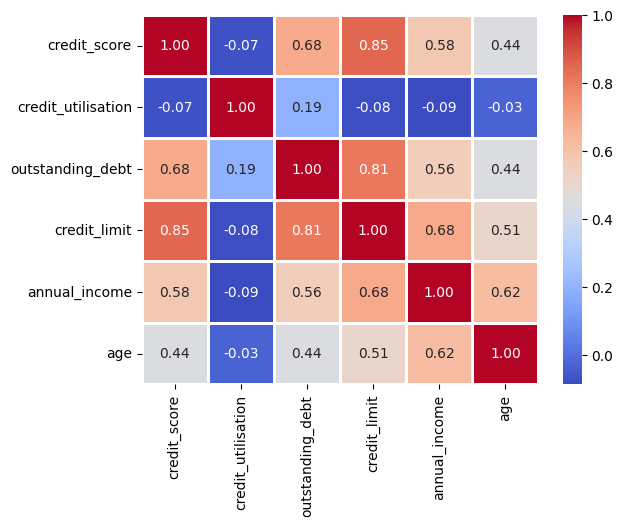

In [294]:
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.8)
plt.show()

In [ ]:
# Transactions Table

In [295]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [296]:
df_transactions.shape

(500000, 7)

In [297]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [300]:
df_transactions[df_transactions.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


In [302]:
df_transactions.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', None], dtype=object)

In [301]:
df_transactions.platform.mode()

0    Amazon
Name: platform, dtype: object

In [303]:
df_transactions.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

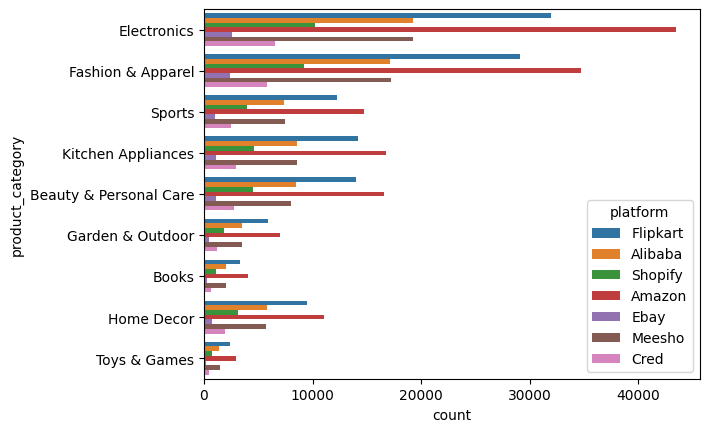

In [308]:
sns.countplot(y="product_category",hue="platform",data=df_transactions)

In [310]:
df_transactions.platform.mode()[0]

'Amazon'

In [312]:
df_transactions['platform'] = df_transactions['platform'].fillna(df_transactions['platform'].mode()[0])

In [313]:
df_transactions.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [314]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [316]:
df_trans_zero= df_transactions[df_transactions.tran_amount==0]
df_trans_zero.shape

(4734, 7)

In [317]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [319]:
df_trans_zero.product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [320]:
df_trans_zero[["platform","product_category","payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [325]:
df_trans1 = df_transactions[
    (df_transactions.platform == "Amazon") &
    (df_transactions.product_category == "Electronics") &
    (df_transactions.payment_type == "Credit Card")
]
df_trans1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [327]:
df_transactions[df_transactions.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [329]:
median_to_replace = df_trans1[df_transactions.tran_amount>0].tran_amount.median()
median_to_replace

C:\Users\Mamatha\AppData\Local\Temp\ipykernel_1656\675103201.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  median_to_replace = df_trans1[df_transactions.tran_amount>0].tran_amount.median()


np.float64(554.0)

In [331]:
df_transactions['tran_amount'] = df_transactions['tran_amount'].replace(0, median_to_replace)

In [332]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

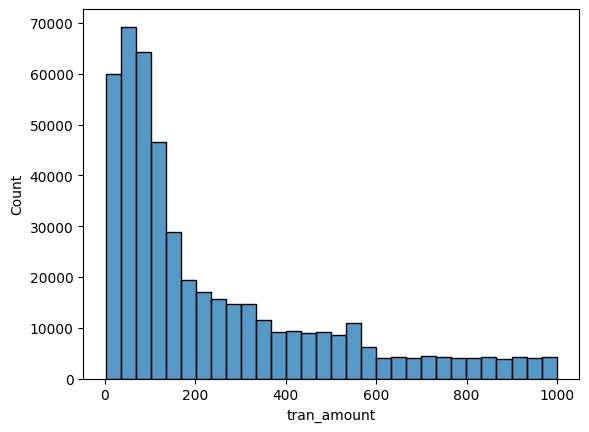

In [339]:
sns.histplot(df_transactions[df_transactions.tran_amount<10000].tran_amount,bins=30)

In [343]:
Q1,Q3 = df_transactions['tran_amount'].quantile([0.25,0.75])
IQR = Q3-Q1
lower = Q1 -2*IQR
upper = Q3 +2*IQR
lower,upper

(-628.0, 1107.0)

In [347]:
df_tran_outliers = df_transactions[df_transactions.tran_amount>=upper]
df_tran_outliers.shape

(25000, 7)

In [348]:
df_tras_normal = df_transactions[df_transactions.tran_amount<=upper]
df_tras_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [364]:
tran_mean_per_category = df_tras_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [365]:

df_transactions.loc[df_tran_outliers.index, "tran_amount"] = df_tran_outliers["product_category"].map(tran_mean_per_category)



In [366]:

df_transactions.loc[df_tran_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,tran_outlier_category
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card,Beauty & Personal Care
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay,Toys & Games
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card,Kitchen Appliances
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay,Fashion & Apparel
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card,Kitchen Appliances
...,...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay,Fashion & Apparel
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking,Fashion & Apparel
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card,Sports
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay,Sports


<Axes: xlabel='tran_amount', ylabel='Count'>

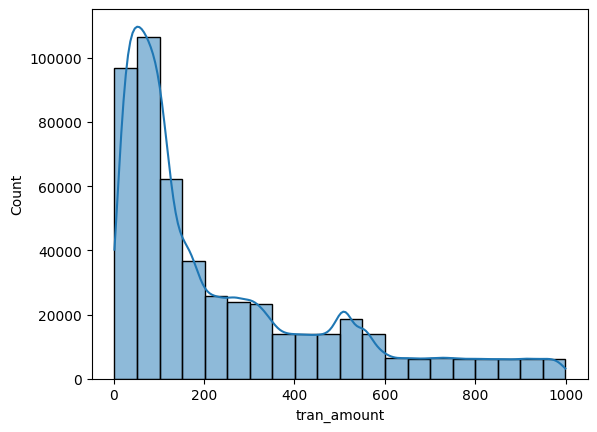

In [369]:
sns.histplot(df_transactions.tran_amount,kde=True,bins=20)


In [370]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,tran_outlier_category
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe,NaN
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card,NaN
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe,NaN
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay,NaN
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking,NaN


<Axes: xlabel='payment_type', ylabel='count'>

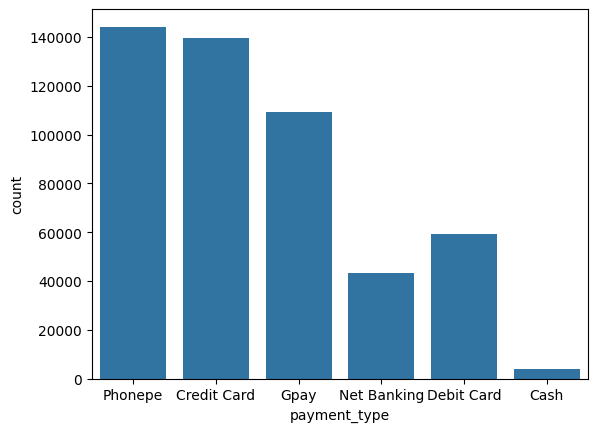

In [371]:
sns.countplot(x=df_transactions.payment_type)

In [372]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2.0,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3.0,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4.0,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5.0,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [376]:
df_merge2=pd.merge(df_merged,df_transactions,on="cust_id",how="inner")
df_merge2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type,tran_outlier_category
0,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,40000.0,700-749,40000.0,1283,2023-01-01,30,Shopify,Fashion & Apparel,Net Banking,NaN
1,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,40000.0,700-749,40000.0,1382,2023-01-01,96,Amazon,Sports,Debit Card,NaN
2,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,40000.0,700-749,40000.0,1521,2023-01-01,86,Meesho,Garden & Outdoor,Gpay,NaN
3,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,40000.0,700-749,40000.0,1576,2023-01-01,149,Amazon,Beauty & Personal Care,Phonepe,NaN
4,1.0,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,40000.0,700-749,40000.0,1757,2023-01-01,37,Flipkart,Fashion & Apparel,Credit Card,NaN


<Axes: xlabel='age_group', ylabel='count'>

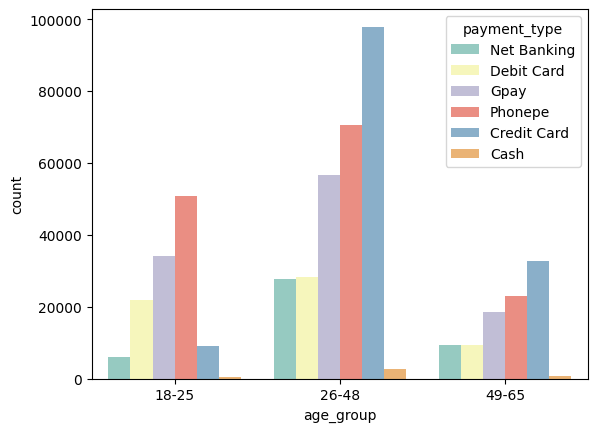

In [378]:
sns.countplot(x="age_group",hue="payment_type",data=df_merge2,palette='Set3')

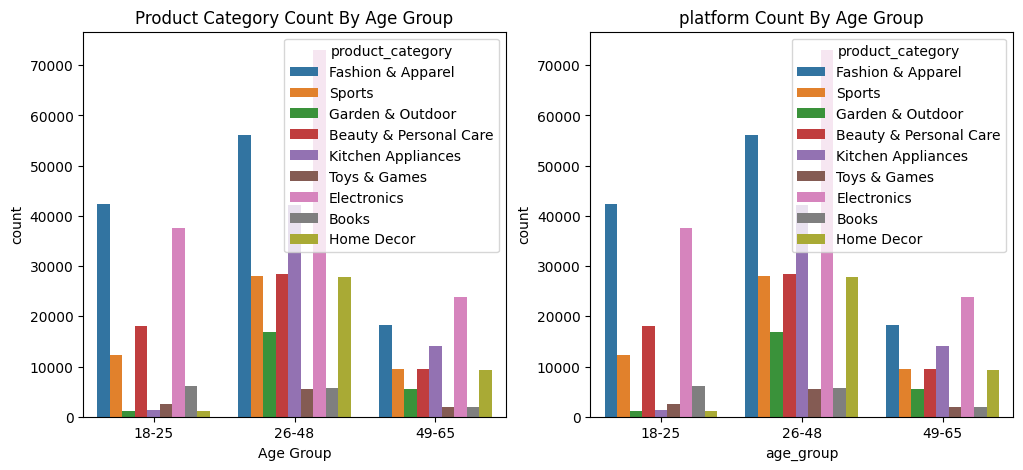

In [385]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='age_group',hue="product_category",data=df_merge2,ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")

sns.countplot(x='age_group',hue="product_category",data=df_merge2,ax=ax2)
ax2.set_title("platform Count By Age Group")
plt.show()